# CHAPTER 4 NumPy Basics: Arrays and Vectorized Computation

To give you an idea of the performance difference, consider a NumPy array of one
million integers, and the equivalent Python list:

In [2]:
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%time for i in range(10):my_arr2 = my_arr *2

Wall time: 16 ms


In [4]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 18.9 ms


In [5]:
%time for i in range(10): my_list2 = [x *2 for x in my_list]

Wall time: 780 ms


NumPy-based algorithms are generally 10 to 100 times faster (or more) than their
pure Python counterparts and use significantly less memory.

## 4.1 The NumPy ndarray: A Multidimensional Array Object 

In [6]:
data = np.random.randn(2,3)
data

array([[ 1.19716046, -0.95962394, -1.27889673],
       [ 0.21382759, -1.85206261,  1.38007697]])

In [7]:
data*10

array([[ 11.97160463,  -9.59623936, -12.78896728],
       [  2.1382759 , -18.52062615,  13.80076968]])

In [8]:
data + data

array([[ 2.39432093, -1.91924787, -2.55779346],
       [ 0.42765518, -3.70412523,  2.76015394]])

An ndarray is a generic multidimensional container for homogeneous data; that is, all
of the elements must be the same type.

In [9]:
data.shape

(2, 3)

In [10]:
data.dtype

dtype('float64')

###  Creating ndarrays

In [11]:
data1= [6,7.5,8,0,1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [12]:
data2= [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [13]:
arr2.ndim # 几维？

2

In [14]:
arr2.shape

(2, 4)

In [15]:
# zeros and ones create arrays of 0s or 1s
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [17]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [18]:
# empty creates an array without initializing its values to any particular value.
np.empty((2, 3, 2))

array([[[9.64800086e-312, 3.16202013e-322],
        [0.00000000e+000, 0.00000000e+000],
        [6.23053953e-307, 3.92574739e+179]],

       [[1.60274246e-051, 1.00389035e-042],
        [1.13053667e-042, 5.98443718e+174],
        [1.73997681e+184, 4.50642136e+174]]])

In [19]:
# arange is an array-valued version of the built-in Python range function:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data Types for ndarrays

In [20]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
print(arr1.dtype)
print(arr2.dtype)

float64
int32


In [21]:
 arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int32')

In [22]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [23]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [24]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype = np.string_)

In [25]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [26]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [27]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

###  Arithmetic with NumPy Arrays

In [28]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [29]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [30]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [31]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [32]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

###  Basic Indexing and Slicing

In [33]:
arr = np.arange(10)

In [34]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
arr[5:8]

array([5, 6, 7])

In [36]:
arr[5:8] = 12

In [37]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

An important first distinction from Python’s built-in lists is that array slices are views on the original array.
This means that the data is not copied, and any modifications to the view will be
reflected in the source array.

In [38]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [39]:
arr_slice[1] = 12345

In [40]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [42]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

If you want a copy of a slice of an ndarray instead of a view, you
will
need
to
explicitly
copy
the
array—for
example,
arr[5:8].copy().

In [44]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [45]:
arr2d[0]

array([1, 2, 3])

In [46]:
arr2d[0,2]

3

In [48]:
arr2d[0][2]  # the same as the up cell

3

In [49]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [50]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [51]:
old_values = arr3d[0].copy()

In [52]:
arr3d[0]=42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [54]:
arr3d[0]=old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [55]:
arr3d[1, 0]

array([7, 8, 9])

###  Indexing with slices

In [56]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [57]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [58]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [61]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [62]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [63]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [64]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing 

In [65]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [66]:
data = np.random.randn(7, 4)

In [67]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [68]:
data

array([[ 2.6244219 , -1.83422086,  1.47837332,  0.24996649],
       [-1.08925422, -0.81056767,  1.22301045,  1.23443257],
       [ 0.55218405, -1.34994149,  1.40375964, -0.90705975],
       [-0.32354835,  0.99858548,  0.44262333, -0.19231294],
       [ 0.28071139,  1.64626527, -0.65695948, -0.48479275],
       [-0.43546289,  1.10910528, -0.13919025,  0.60332908],
       [-2.26540139, -0.63448741, -2.08972996, -0.25505125]])

In [69]:
names =='Bob'

array([ True, False, False,  True, False, False, False])

In [70]:
data[names=='Bob']

array([[ 2.6244219 , -1.83422086,  1.47837332,  0.24996649],
       [-0.32354835,  0.99858548,  0.44262333, -0.19231294]])

In [71]:
data[names=='Bob', 2:]

array([[ 1.47837332,  0.24996649],
       [ 0.44262333, -0.19231294]])

In [72]:
data[names=='Bob', 3]

array([ 0.24996649, -0.19231294])

In [73]:
names!='Bob'

array([False,  True,  True, False,  True,  True,  True])

In [74]:
data[names!='Bob']

array([[-1.08925422, -0.81056767,  1.22301045,  1.23443257],
       [ 0.55218405, -1.34994149,  1.40375964, -0.90705975],
       [ 0.28071139,  1.64626527, -0.65695948, -0.48479275],
       [-0.43546289,  1.10910528, -0.13919025,  0.60332908],
       [-2.26540139, -0.63448741, -2.08972996, -0.25505125]])

In [75]:
data[~(names=='Bob')]

array([[-1.08925422, -0.81056767,  1.22301045,  1.23443257],
       [ 0.55218405, -1.34994149,  1.40375964, -0.90705975],
       [ 0.28071139,  1.64626527, -0.65695948, -0.48479275],
       [-0.43546289,  1.10910528, -0.13919025,  0.60332908],
       [-2.26540139, -0.63448741, -2.08972996, -0.25505125]])

In [76]:
cond = names == 'Bob'
data[~cond]

array([[-1.08925422, -0.81056767,  1.22301045,  1.23443257],
       [ 0.55218405, -1.34994149,  1.40375964, -0.90705975],
       [ 0.28071139,  1.64626527, -0.65695948, -0.48479275],
       [-0.43546289,  1.10910528, -0.13919025,  0.60332908],
       [-2.26540139, -0.63448741, -2.08972996, -0.25505125]])

In [77]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [78]:
data[mask]

array([[ 2.6244219 , -1.83422086,  1.47837332,  0.24996649],
       [ 0.55218405, -1.34994149,  1.40375964, -0.90705975],
       [-0.32354835,  0.99858548,  0.44262333, -0.19231294],
       [ 0.28071139,  1.64626527, -0.65695948, -0.48479275]])

The Python keywords and and or do not work with boolean arrays.
Use & (and) and | (or) instead.

In [79]:
data[data < 0] = 0
data

array([[2.6244219 , 0.        , 1.47837332, 0.24996649],
       [0.        , 0.        , 1.22301045, 1.23443257],
       [0.55218405, 0.        , 1.40375964, 0.        ],
       [0.        , 0.99858548, 0.44262333, 0.        ],
       [0.28071139, 1.64626527, 0.        , 0.        ],
       [0.        , 1.10910528, 0.        , 0.60332908],
       [0.        , 0.        , 0.        , 0.        ]])

In [80]:
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 1.22301045, 1.23443257],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 1.10910528, 0.        , 0.60332908],
       [0.        , 0.        , 0.        , 0.        ]])

###  Fancy Indexing

In [81]:
arr = np.empty((8, 4))
arr

array([[9.64800419e-312, 1.10670705e-321, 0.00000000e+000,
        0.00000000e+000],
       [2.16007218e-027, 3.16251369e+180, 1.96086892e+243,
        1.09476743e-065],
       [2.28176682e+243, 5.23584369e-143, 1.29060661e+248,
        8.42244190e+252],
       [4.90900659e+252, 3.88621453e+285, 5.30992040e+180,
        6.34914943e+151],
       [3.81391076e+180, 1.61948559e+286, 1.16466606e-028,
        1.16071791e-028],
       [1.04917089e-142, 4.25963700e-096, 8.37170577e-144,
        2.51968629e+180],
       [2.87505123e+161, 1.47280336e+179, 2.60222703e+251,
        9.13982048e+242],
       [1.11530848e+277, 1.06314514e+248, 2.22046252e+142,
        6.12033286e+257]])

In [82]:
for i in range(8):
    arr[i]=i

In [83]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select out a subset of the rows in a particular order, you can simply pass a list or
ndarray of integers specifying the desired order:

In [84]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [85]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [86]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [87]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected. Regardless of
how many dimensions the array has (here, only 2), the result of fancy indexing is
always one-dimensional.

The behavior of fancy indexing in this case is a bit different from what some users
might have expected (myself included), which is the rectangular region formed by
selecting a subset of the matrix’s rows and columns. Here is one way to get that:

In [89]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Keep in mind that fancy indexing, unlike slicing, always copies the data into a new
array.

###  Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the under‐
lying data without copying anything. Arrays have the transpose method and also the
special T attribute:

In [90]:
arr = np.arange(15).reshape((3,5))

In [91]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [93]:
arr.T #转置

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [95]:
#点积
arr = np.random.randn(6,3)
arr

array([[-0.73036363, -1.05468405,  0.79270019],
       [ 0.59275124,  0.11790131, -1.18431153],
       [ 0.74180019, -1.29965721, -0.17716037],
       [-0.82490983, -0.19422905,  0.89909757],
       [ 1.34440831, -0.36510211, -0.39902257],
       [ 2.10430662,  0.22143172, -0.40672681]])

In [97]:
np.dot(arr.T,arr)

array([[ 8.35106886,  0.01143844, -3.5463807 ],
       [ 0.01143844,  3.03542453, -0.86444148],
       [-3.5463807 , -0.86444148,  3.19537533]])

In [98]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [99]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Here, the axes have been reordered with the second axis first, the first axis second,
and the last axis unchanged.

In [100]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [101]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

##  4.2 Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations
on data in ndarrays. You can think of them as fast vectorized wrappers for simple
functions that take one or more scalar values and produce one or more scalar results.

In [102]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [103]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [104]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [108]:
x = np.random.randn(8)
y = np.random.randn(8)
print(x,'\n')
print(y,'\n')

[-0.15233034 -0.33655426  0.73431787 -0.02118059  0.15577116  0.36027925
  0.4876796   1.14089514] 

[-0.88568593 -1.25503759 -0.86519487 -0.32527201  1.12757563  1.54412592
 -0.0885572  -0.19309979] 



In [109]:
np.maximum(x, y)

array([-0.15233034, -0.33655426,  0.73431787, -0.02118059,  1.12757563,
        1.54412592,  0.4876796 ,  1.14089514])

In [110]:
#分离整数和小数
arr = np.random.randn(7) * 5
print(arr,'\n')
remainder, whole_part = np.modf(arr)
print(remainder,'\n')
print(whole_part,'\n')

[ 0.80100113  1.913      -5.99697796 -1.28322867  2.44346965 -6.92429121
 -3.91451863] 

[ 0.80100113  0.913      -0.99697796 -0.28322867  0.44346965 -0.92429121
 -0.91451863] 

[ 0.  1. -5. -1.  2. -6. -3.] 



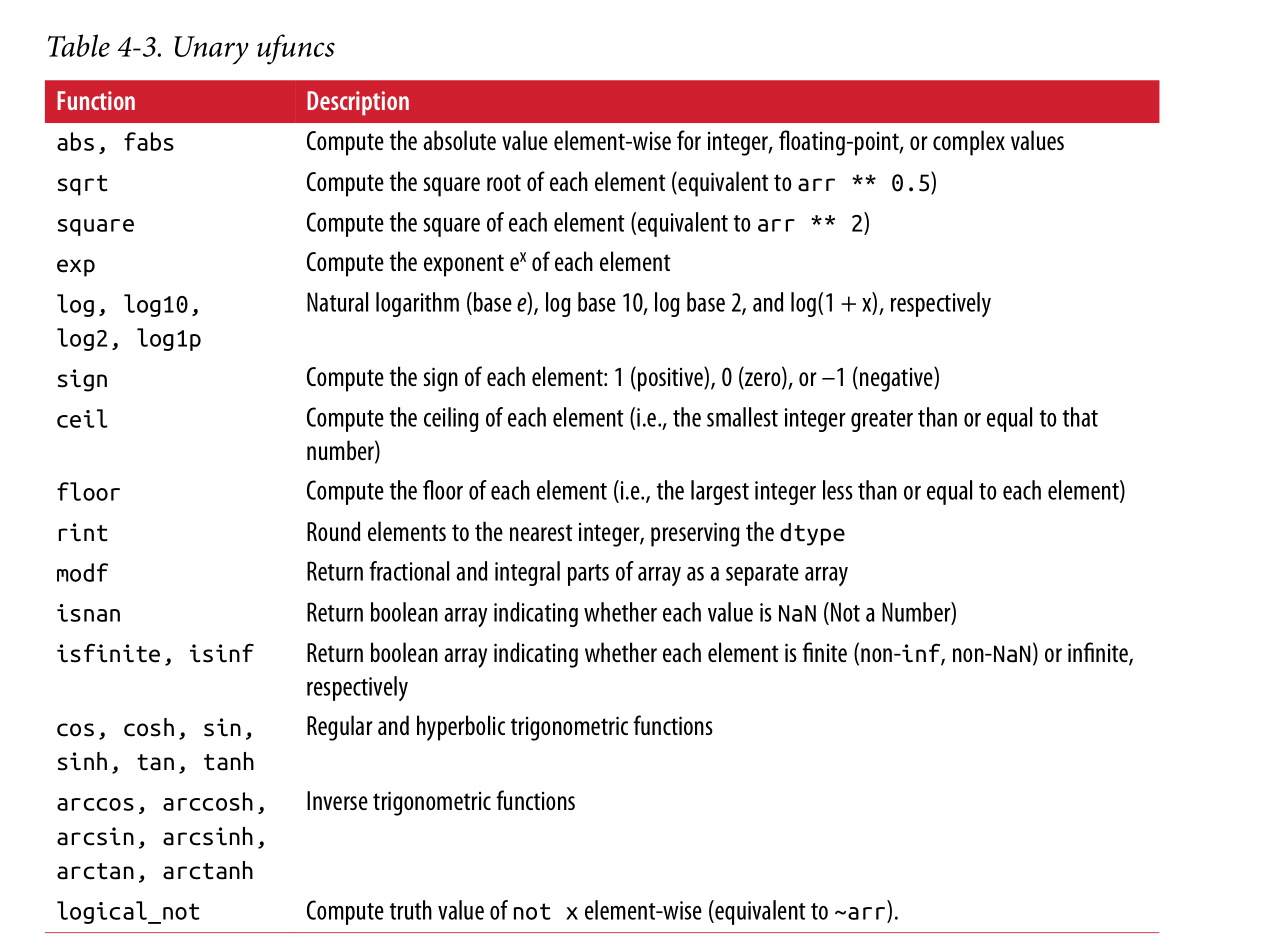

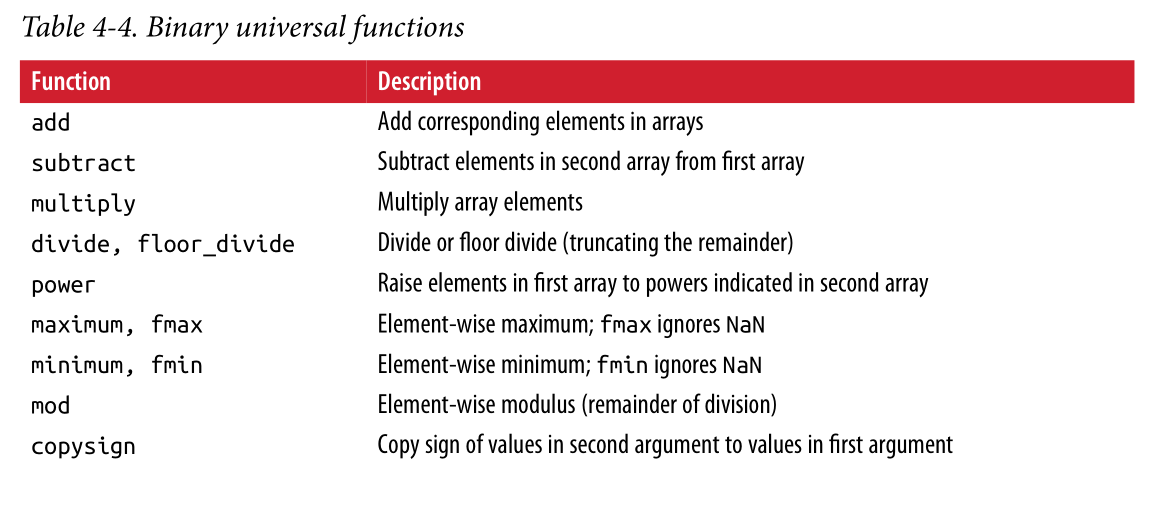
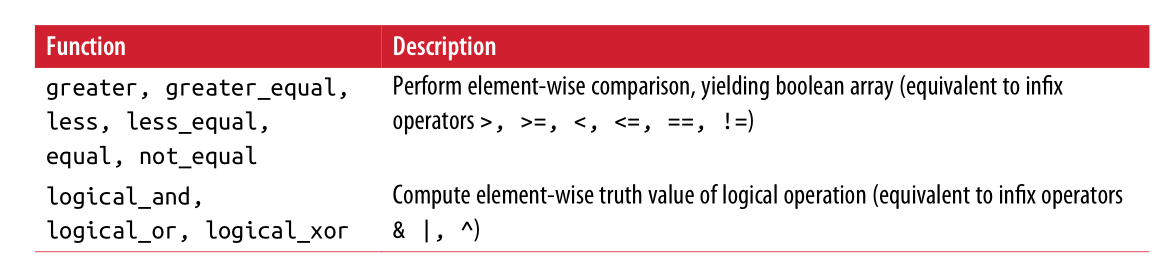

###  Expressing Conditional Logic as Array Operations

In [113]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [114]:
cond = np.array([True, False, True, True, False])

In [115]:
# if cond true xarr, else yarr
result = np.where(cond,xarr,yarr)

In [116]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to np.where don’t need to be arrays; one or both of
them can be scalars. A typical use of where in data analysis is to produce a new array
of values based on another array. Suppose you had a matrix of randomly generated
data and you wanted to replace all positive values with 2 and all negative values with
–2. This is very easy to do with np.where:

In [117]:
arr = np.random.randn(4,4)
arr

array([[ 4.42241544e-01, -3.32139957e-01,  3.05659636e-01,
        -8.06741581e-01],
       [-3.17650170e-01,  1.09395681e-03,  1.13549779e+00,
        -1.26413893e+00],
       [-1.14909042e+00,  2.61731755e+00,  4.48432864e-01,
         1.13738709e+00],
       [ 7.40088511e-01,  7.82916915e-01, -6.09379773e-02,
         3.23674483e-02]])

In [118]:
arr>0

array([[ True, False,  True, False],
       [False,  True,  True, False],
       [False,  True,  True,  True],
       [ True,  True, False,  True]])

In [119]:
np.where(arr>0,2,-2)

array([[ 2, -2,  2, -2],
       [-2,  2,  2, -2],
       [-2,  2,  2,  2],
       [ 2,  2, -2,  2]])

In [120]:
np.where(arr>0,2,arr)

array([[ 2.        , -0.33213996,  2.        , -0.80674158],
       [-0.31765017,  2.        ,  2.        , -1.26413893],
       [-1.14909042,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        , -0.06093798,  2.        ]])

### Mathematical and Statistical Methods

In [121]:
arr = np.random.randn(5, 4)
arr

array([[ 0.20615048,  0.52563411, -0.03829868, -0.11030303],
       [ 0.8010425 ,  0.99895749,  1.68518884, -1.28568217],
       [ 0.71150999,  1.23612918,  0.4239345 , -0.26792568],
       [-0.77223413, -0.27591817, -0.60378621,  0.30304524],
       [ 0.14737849,  1.08085856, -0.74650088, -0.36603738]])

In [122]:
arr.mean()

0.18265715231787746

In [123]:
np.mean(arr)

0.18265715231787746

In [124]:
arr.sum()

3.6531430463575494

In [125]:
arr.mean(axis=1)

array([ 0.14579572,  0.54987667,  0.525912  , -0.33722332,  0.0289247 ])

In [126]:
arr.mean(axis=0)

array([ 0.21876947,  0.71313223,  0.14410752, -0.34538061])

Here, arr.mean(1) means “compute mean across the columns” where arr.sum(0)
means “compute sum down the rows.”

### Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus,
sum is often used as a means of counting True values in a boolean array:

In [127]:
arr = np.random.randn(100)

In [128]:
 (arr > 0).sum() # Number of positive values

49

In [129]:
bools = np.array([False, False, True, False])

In [130]:
bools.any()

True

In [131]:
bools.all()

False

### Sorting

In [132]:
arr = np.random.randn(6)

In [133]:
arr

array([-0.81634638,  0.61511846, -1.13321421, -1.28777864, -0.75137646,
        1.79559917])

In [134]:
arr.sort()

In [135]:
arr

array([-1.28777864, -1.13321421, -0.81634638, -0.75137646,  0.61511846,
        1.79559917])

In [136]:
arr = np.random.randn(5, 3)
arr

array([[-0.68686584,  0.31873125,  0.76137878],
       [ 1.001274  ,  1.23461077,  1.02213495],
       [ 0.87948968,  0.08508451,  1.29390061],
       [-1.09199067, -2.11089546,  0.77410316],
       [ 0.13926033,  0.804446  ,  0.37879162]])

In [138]:
arr.sort(1) #sort by rows

In [139]:
arr

array([[-0.68686584,  0.31873125,  0.76137878],
       [ 1.001274  ,  1.02213495,  1.23461077],
       [ 0.08508451,  0.87948968,  1.29390061],
       [-2.11089546, -1.09199067,  0.77410316],
       [ 0.13926033,  0.37879162,  0.804446  ]])

In [141]:
large_arr = np.random.randn(1000)

In [142]:
large_arr.sort()

In [143]:
large_arr[int(0.05 * len(large_arr))] # 5% quantile 5分位数

-1.5454594305549991

### Unique and Other Set Logic

In [144]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [146]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [147]:
#判断两个数组里面重合的数
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

In [148]:
values[np.in1d(values, [2,3,6])]

array([6, 3, 2, 6])

## 4.4 File Input and Output with Arrays

np.save and np.load are the two workhorse functions for efficiently saving and load‐
ing array data on disk. Arrays are saved by default in an uncompressed raw binary
format with file extension .npy:

In [149]:
arr = np.arange(10)
np.save('some_arry',arr)

In [150]:
np.load('some_arry.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 4.5 Linear Algebra

In [151]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [152]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [153]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [154]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [157]:
np.dot(x,y) # they are the same

array([[ 28.,  64.],
       [ 67., 181.]])

In [158]:
np.dot(x, np.ones(3))

array([ 6., 15.])

In [159]:
#The @ symbol (as of Python 3.5) also works as an infix operator that performs matrix multiplication:
x @ np.ones(3)

array([ 6., 15.])

## 4.6 Pseudorandom Number Generation

In [166]:
# you can get a 4 × 4 array of samples from the standard normal distribution using normal:
samples = np.random.normal(size=(4,4))

In [167]:
samples

array([[-1.19210295, -1.553249  , -0.69816028, -0.98728557],
       [-0.14472054,  1.46764547,  0.55599584,  0.41122401],
       [ 0.84010126,  1.25266539,  0.34125287,  1.41331836],
       [ 0.62601207, -1.06972974,  1.39867436, -1.57069215]])

In [173]:
# python's built in random module
from random import normalvariate
N=1000000
%timeit samples=[normalvariate(0,1) for i in range(N)]

865 ms ± 54.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [177]:
%timeit np.random.normal(size=(N))

24.2 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


We say that these are pseudorandom numbers because they are generated by an algo‐
rithm with deterministic behavior based on the seed of the random number genera‐
tor. You can change NumPy’s random number generation seed using
np.random.seed:

In [176]:
np.random.seed(1234)

The data generation functions in numpy.random use a global random seed. To avoid
global state, you can use numpy.random.RandomState to create a random number
generator isolated from others:

In [178]:
rng = np.random.RandomState(1234)

In [179]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

## 4.7 Example: Random Walks

The simulation of random walks provides an illustrative application of utilizing array
operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and
–1 occurring with equal probability.

In [180]:
import matplotlib.pyplot as plt

In [207]:
import random
position = 0
walk = [position]
for i in range(100):
    step = 1 if random.randint(0,1) else -1
    #print(step)
    position += step
    walk.append(position)

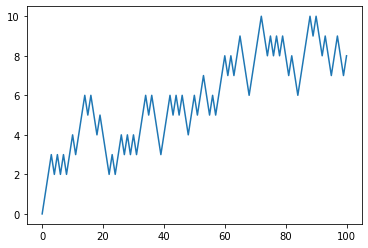

In [208]:
plt.plot(walk)

You might make the observation that walk is simply the cumulative sum of the ran‐
dom steps and could be evaluated as an array expression. Thus, I use the np.random
module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the
cumulative sum:

In [214]:
nsteps=1000
draws = np.random.randint(0,2,size=nsteps)
#print(draws)
steps=np.where(draws>0,1,-1)
#print(steps)
walk = steps.cumsum()

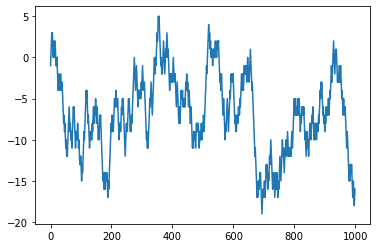

In [216]:
plt.plot(walk)

In [217]:
walk.min()

-19

In [218]:
walk.max()

5

A more complicated statistic is the first crossing time, the step at which the random
walk reaches a particular value. Here we might want to know how long it took the
random walk to get at least 10 steps away from the origin 0 in either direction.
np.abs(walk) >= 10 gives us a boolean array indicating where the walk has reached
or exceeded 10, but we want the index of the first 10 or –10. Turns out, we can compute this using argmax, which returns the first index of the maximum value in the
boolean array (True is the maximum value):

In [219]:
np.abs(walk)>10

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [220]:
(np.abs(walk)>10).argmax()

50

Note that using argmax here is not always efficient because it always makes a full scan
of the array. In this special case, once a True is observed we know it to be the maxi‐
mum value.

### Simulating Many Random Walks at Once

If your goal was to simulate many random walks, say 5,000 of them, you can generate
all of the random walks with minor modifications to the preceding code. If passed a
2-tuple, the numpy.random functions will generate a two-dimensional array of draws,
and we can compute the cumulative sum across the rows to compute all 5,000 ran‐
dom walks in one shot:

In [221]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks,nsteps))
steps = np.where(draws>0,1,-1)
walks = steps.cumsum(1)  #列的累和，行代表每个walk

In [227]:
walks.shape

(5000, 1000)

In [229]:
print(walks.max())
print(walks.min())

108
-129


Out of these walks, let’s compute the minimum crossing time to 30 or –30. This is
slightly tricky because not all 5,000 of them reach 30. We can check this using the any
method:

In [248]:
hits30 = (np.abs(walks)>=30).any(1)

In [249]:
hits30

array([ True,  True, False, ...,  True,  True, False])

In [251]:
hits30.shape

(5000,)

In [252]:
hits30.sum() #number of walks that hit 30 or -30

3401

In [253]:
crossing_time = (np.abs(walks[hits30])>=30).argmax(1)

In [254]:
crossing_time

array([353, 297, 317, ..., 383, 273, 241], dtype=int64)

In [255]:
crossing_time.min()

59